In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Loss function = sum(-ylog(h(t))-(1-y)log(1-h(t)))
#h(t) = predection = sigmoid(t) = 1/(1+e^-t)
#Where t is the linear fucntion W^tx where w is the weight and x is the feature obeservation
#Gradeint descent: w: w + r*(dl/dw)
#dl/dw = sum(x(y-h(t)))

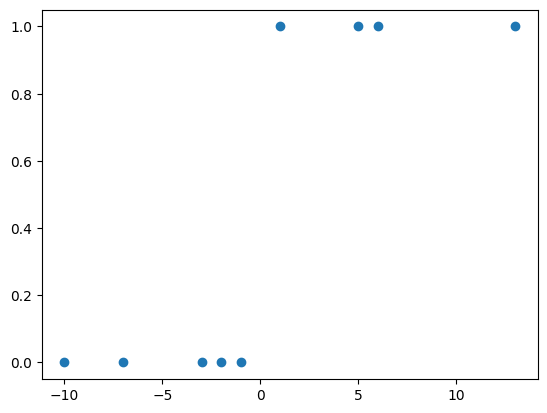

In [3]:
X = np.array([-1,5,-10,6,1,-3,-2,-7,13])
y = np.array([0,1,0,1,1,0,0,0,1])
plt.scatter(X,y)

In [4]:
#Testing the accuracy of the sklearn logit. But I dont think they use gradeint descent

In [6]:
from sklearn.linear_model import LogisticRegression
X_resample = X.reshape(-1,1)
lr = LogisticRegression()
lr.fit(X_resample,y)
pred = np.array([-1,-1,-5,6,7,-1]).reshape(-1,1)
lr.predict(pred)

array([0, 0, 0, 1, 1, 0])

In [26]:
class logit():

  def __init__ (self):
    self.m = np.random.rand()
    self.old_loss = float('inf')
    self.n = 0

  def sigmoid(self,z):
    return 1/(1+np.exp(-z))

  def loss_func(self,y,y_hat):
    return -y*np.log(y_hat) - (1-y)*(np.log(1-y_hat))

  def gradeint(self,x,y,y_hat):
    return 1/self.n * x*(y-y_hat)

  def descent(self,X,y,step_size,converge):
    self.n = len(X)
    loss = 0
    dm = 0

    for i in range(len(X)):
      z = self.m * X[i]
      y_hat = self.sigmoid(z)
      loss += self.loss_func(y[i],y_hat)
      dm += self.gradeint(X[i],y[i],y_hat)

    #Check for convergence
    roc = abs((loss-self.old_loss)/loss)
    if roc <= converge:
      print(f"Converged at loss of {loss} and rate of change of {roc}")
      return False

    #Else update slope, loss, and update the user on loss
    self.m += step_size * dm
    self.old_loss = loss
    print(f"Current loss: {loss}")

    return True

  def fit(self,X,y,epoch=1000,step_size=.025,converge=.01):
    for _ in range(epoch):
      if not self.descent(X,y,step_size,converge): return

  def predict(self,X):
    result = []
    for x in X:
      z = x*self.m
      y_pred = 0 if self.sigmoid(z) <.5 else 1
      result.append(y_pred)
    return result

In [27]:
model = logit()
model.fit(X,y)
model.predict([10,-1,50,-100])

Current loss: 0.9308129212400593
Converged at loss of 0.9270266149493214 and rate of change of 0.004084355540261312


[1, 0, 1, 0]